# Eksploratori dan Analisis Data COVID-19 berdasarkan Time Series Analysis
1873001 - Kristanto Tanuwidjaja

## Exploratory Data Analysis
## COVID-19 data from John Hopkins University

## Import libraries
Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'scroll': True,
        'width': '100%',
        'height': '100%',
})

# Global Confirmed Cases

## Read the dataset from CSV

In [3]:
confirm_cases=pd.read_csv("./Datasets/CONVENIENT_global_confirmed_cases.csv").drop([0]).rename(columns={'Country/Region': 'Date'})
confirm_cases

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,11/25/20,210.0,644.0,1025.0,77.0,79.0,1.0,8593.0,1563.0,0.0,...,118.0,242.0,0.0,319.0,5.0,1720.0,0.0,10.0,69.0,110.0
309,11/26/20,226.0,656.0,1085.0,106.0,99.0,1.0,9043.0,1785.0,1.0,...,129.0,182.0,0.0,398.0,10.0,1766.0,0.0,13.0,18.0,115.0
310,11/27/20,123.0,645.0,1058.0,76.0,88.0,0.0,7846.0,1476.0,1.0,...,186.0,104.0,0.0,309.0,8.0,1936.0,0.0,11.0,16.0,91.0
311,11/28/20,127.0,545.0,1044.0,0.0,79.0,0.0,6098.0,1248.0,0.0,...,208.0,205.0,0.0,236.0,2.0,1461.0,0.0,12.0,20.0,108.0


## Another ways ...
Another ways to see the dataset

In [6]:
# confirm_cases.head()
# confirm_cases.tail()
confirm_cases.iloc[5:14]

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
6,1/28/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1/29/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1/30/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1/31/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2/1/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
11,2/2/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,2/3/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
13,2/4/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2/5/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Information about the dataset

In [9]:
# confirm_cases.info()
# confirm_cases.describe()
confirm_cases.isnull().sum()

Date                  0
Afghanistan           0
Albania               0
Algeria               0
Andorra               0
                     ..
West Bank and Gaza    0
Western Sahara        0
Yemen                 0
Zambia                0
Zimbabwe              0
Length: 272, dtype: int64

## Selecting 3 countries near Indonesia

In [10]:
asia_confirm=confirm_cases[['Date', 'Indonesia', 'Malaysia', 'Singapore']]
asia_confirm['Date']=pd.to_datetime(asia_confirm.Date)
asia_confirm

,Date,Indonesia,Malaysia,Singapore
1,2020-01-23,0.0,0.0,1.0
2,2020-01-24,0.0,0.0,2.0
3,2020-01-25,0.0,3.0,0.0
4,2020-01-26,0.0,1.0,1.0
5,2020-01-27,0.0,0.0,1.0
...,...,...,...,...
308,2020-11-25,5534.0,970.0,7.0
309,2020-11-26,4917.0,935.0,5.0
310,2020-11-27,5828.0,1109.0,4.0
311,2020-11-28,5418.0,1315.0,6.0


## Max value of Covid-19 cases near Indonesia per day

In [11]:
total_max_value=pd.DataFrame(asia_confirm.max().drop(['Date']), columns=['Max Value'])
total_max_value

,Max Value
Indonesia,6267.0
Malaysia,2188.0
Singapore,1426.0


## Plotting Covid-19 Confirmed Cases near Indonesia per day using Bar Chart

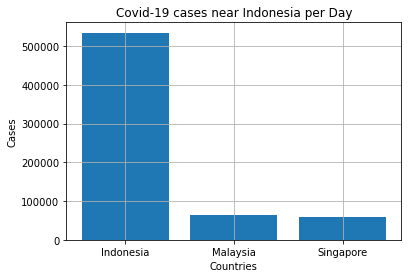

In [12]:
total_id=asia_confirm['Indonesia'].sum()
total_my=asia_confirm['Malaysia'].sum()
total_sg=asia_confirm['Singapore'].sum()

exp_vals = [total_id, total_my, total_sg]
exp_labels = ["Indonesia", "Malaysia", "Singapore"]

plt.bar(exp_labels, exp_vals)
plt.grid()

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('Covid-19 cases near Indonesia per Day')

plt.show()

In [13]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=['Indonesia', 'Malaysia', 'Singapore'],
        y=[
            asia_confirm['Indonesia'].sum(),
            asia_confirm['Malaysia'].sum(),
            asia_confirm['Singapore'].sum()
        ],
    ))

fig.update_layout(
    title_text="Confirmed Cases in Indonesia, Malaysia, Singapore",
    yaxis=dict(title='Cases',
               titlefont_size=14,
               tickfont_size=14),
    xaxis=dict(title='Country',
               titlefont_size=14,
               tickfont_size=14))

fig.update_yaxes(automargin=True)

fig.show()

## Plotting Covid-19 Confirmed Cases near Indonesia per day using Line Chart

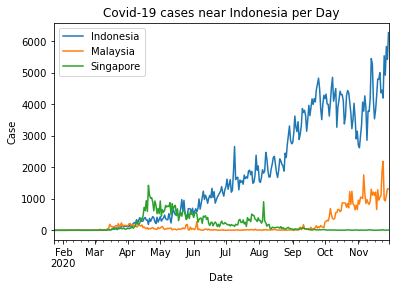

In [14]:
asia_confirm.plot(kind='line', x='Date', y=['Indonesia', 'Malaysia', 'Singapore'])

plt.title('Covid-19 cases near Indonesia per Day')
plt.ylabel('Case')
plt.show()

In [15]:
px.line(asia_confirm, 
        x='Date', 
        y=['Indonesia', 'Malaysia', 'Singapore'], 
        labels={'x': "Date", 'y':'Indonesia'}, 
        title='Confirmed Cases in Indonesia, Singapore, Malaysia')

## Monthly Confirmed Cases in Indonesia

In [16]:
unique_year = pd.DatetimeIndex(asia_confirm['Date']).year.unique()
unique_month = pd.DatetimeIndex(asia_confirm['Date']).month.unique()
list_sum = []
region = 'Indonesia'

d = pd.DatetimeIndex(asia_confirm['Date'])
for y in unique_year :
    for m in unique_month :
        tmp = asia_confirm[(d.month == m) & (d.year == y)]
        print_date = str(y) + '/' + str(m)
        list_sum.append([print_date, tmp[region].sum()])

list_day = [i[0] for i in list_sum]
list_sum = [i[1] for i in list_sum]
preview = pd.DataFrame(list_day, columns=['Date'])
preview['Total Confirmed Cases per Month'] = list_sum

print('Region : ' + region)
preview

Region : Indonesia


,Date,Total Confirmed Cases per Month
0,2020/1,0.0
1,2020/2,0.0
2,2020/3,1528.0
3,2020/4,8590.0
4,2020/5,16355.0
5,2020/6,29912.0
6,2020/7,51991.0
7,2020/8,66420.0
8,2020/9,112212.0
9,2020/10,123080.0


## Let's take a look more ...

## Confirmed Cases of Southeast Asia

In [17]:
se_asia_confirm=confirm_cases[['Date', 'Brunei', 'Burma', 'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 'Malaysia',
            'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'India']]
se_asia_confirm['Date']=pd.to_datetime(se_asia_confirm.Date)
se_asia_confirm

,Date,Brunei,Burma,Cambodia,Timor-Leste,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam,India
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5,2020-01-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2020-11-25,0.0,1330.0,0.0,0.0,5534.0,0.0,970.0,1193.0,7.0,16.0,5.0,44489.0
309,2020-11-26,0.0,1639.0,0.0,0.0,4917.0,0.0,935.0,1382.0,5.0,19.0,10.0,43082.0
310,2020-11-27,0.0,1428.0,1.0,0.0,5828.0,0.0,1109.0,1621.0,4.0,5.0,8.0,41322.0
311,2020-11-28,0.0,1344.0,7.0,0.0,5418.0,0.0,1315.0,1879.0,6.0,11.0,2.0,41810.0


## Number of Total Confirmed Cases in Southeast Asia

In [18]:
se_asia_confirm.sum()

Brunei             150.0
Burma            89486.0
Cambodia           323.0
Timor-Leste         30.0
Indonesia       534266.0
Laos                39.0
Malaysia         64485.0
Philippines     429864.0
Singapore        58213.0
Thailand          3996.0
Vietnam           1343.0
India          9431691.0
dtype: float64

## 5 Largest Confirmed Cases in Southeast Asia

In [19]:
se_asia_confirm.sum().nlargest(5)

India          9431691.0
Indonesia       534266.0
Philippines     429864.0
Burma            89486.0
Malaysia         64485.0
dtype: float64

## Plotting 5 Largest Confirmed Cases in Southeast Asia using Pie Chart

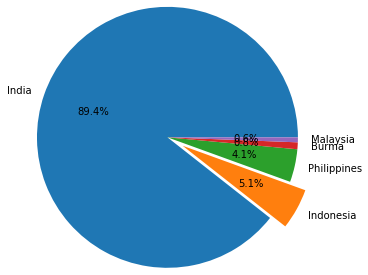

In [20]:
total_in=se_asia_confirm['India'].sum()
total_id=se_asia_confirm['Indonesia'].sum()
total_ph=se_asia_confirm['Philippines'].sum()
total_bu=se_asia_confirm['Burma'].sum()
total_my=se_asia_confirm['Malaysia'].sum()

exp_vals = [total_in, total_id, total_ph, total_bu, total_my]
exp_labels = ["India", "Indonesia", "Philippines", "Burma", "Malaysia"]

plt.pie(exp_vals, labels=exp_labels, radius=1.5, autopct='%0.1f%%', explode=[0,0.2,0,0,0])
plt.show()

## Plotting 5 Largest Confirmed Cases in Southeast Asia using Bar Chart

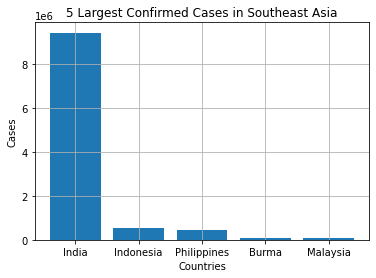

In [21]:
plt.bar(exp_labels, exp_vals)
plt.grid()

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('5 Largest Confirmed Cases in Southeast Asia')

plt.show()

## Another visualization ...
Other visualizations related to time series using Ahlive

## Import Ahlive library

In [22]:
import ahlive as ah

In [23]:
cc_tidy = confirm_cases.melt(
    id_vars=['Date'],
    var_name='Country', value_name='Cases')
display(cc_tidy)

,Date,Country,Cases
0,1/23/20,Afghanistan,0.0
1,1/24/20,Afghanistan,0.0
2,1/25/20,Afghanistan,0.0
3,1/26/20,Afghanistan,0.0
4,1/27/20,Afghanistan,0.0
...,...,...,...
84547,11/25/20,Zimbabwe,110.0
84548,11/26/20,Zimbabwe,115.0
84549,11/27/20,Zimbabwe,91.0
84550,11/28/20,Zimbabwe,108.0


In [24]:
country = ['Indonesia']
cc_subset = cc_tidy.loc[cc_tidy['Country'].isin(country)]
display(cc_subset)

,Date,Country,Cases
45552,1/23/20,Indonesia,0.0
45553,1/24/20,Indonesia,0.0
45554,1/25/20,Indonesia,0.0
45555,1/26/20,Indonesia,0.0
45556,1/27/20,Indonesia,0.0
...,...,...,...
45859,11/25/20,Indonesia,5534.0
45860,11/26/20,Indonesia,4917.0
45861,11/27/20,Indonesia,5828.0
45862,11/28/20,Indonesia,5418.0


In [25]:
cc_country = cc_subset.groupby(['Date', 'Country'])[['Cases']].sum().reset_index()
cc_country = cc_country.loc[cc_country['Date'] >= '5/01/21']
display(cc_country)

,Date,Country,Cases
159,5/1/20,Indonesia,433.0
160,5/10/20,Indonesia,387.0
161,5/11/20,Indonesia,233.0
162,5/12/20,Indonesia,484.0
163,5/13/20,Indonesia,689.0
...,...,...,...
307,9/5/20,Indonesia,3128.0
308,9/6/20,Indonesia,3444.0
309,9/7/20,Indonesia,2880.0
310,9/8/20,Indonesia,3046.0


In [26]:
ah_cc = ah.DataFrame(cc_country, 'Date', 'Cases', label='Country')
ah_cc

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 1, state: 153)
Data variables:
    chart    (item) <U4 'line'
    label    (item) <U9 'Indonesia'
    group    (item) <U1 ''
    interp   (item) <U6 'linear'
    ease     (item) <U6 'in_out'
    x        (item, state) object '5/1/20' '5/10/20' ... '9/8/20' '9/9/20'
    y        (item, state) float64 433.0 387.0 233.0 ... 3.046e+03 3.307e+03


In [28]:
cc_dts = cc_country.copy()
cc_dts['Date'] = pd.to_datetime(cc_dts['Date'])
cc_dts = cc_dts.loc[cc_dts['Date'] >= '5/01/20']
cc_dts = cc_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country'
])['Cases'].last().reset_index()
cc_scale = cc_dts.sort_values('Date')
cc_scale['Cases'] /= 1

[########################################] | 100% Completed |  1.4s



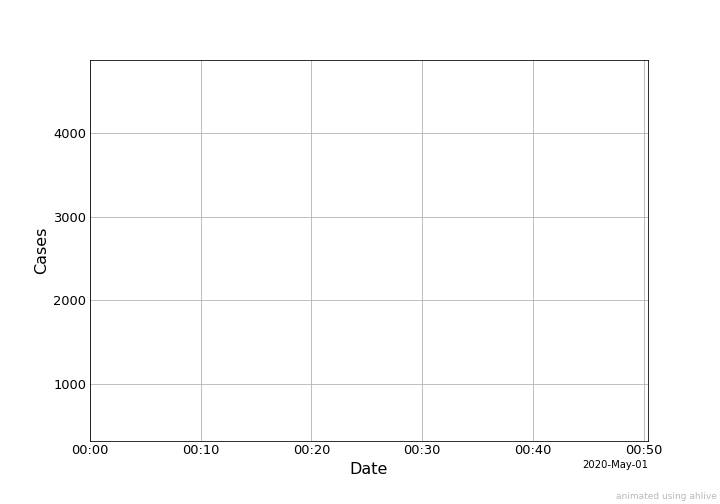

In [29]:
ah_cc = ah.DataFrame(
    cc_scale, 'Date', 'Cases', label='Country',
    figsize=(10, 7), animate='test'
).config('legend', sortby='y')
ah_cc.render()

[########################################] | 100% Completed |  1.4s



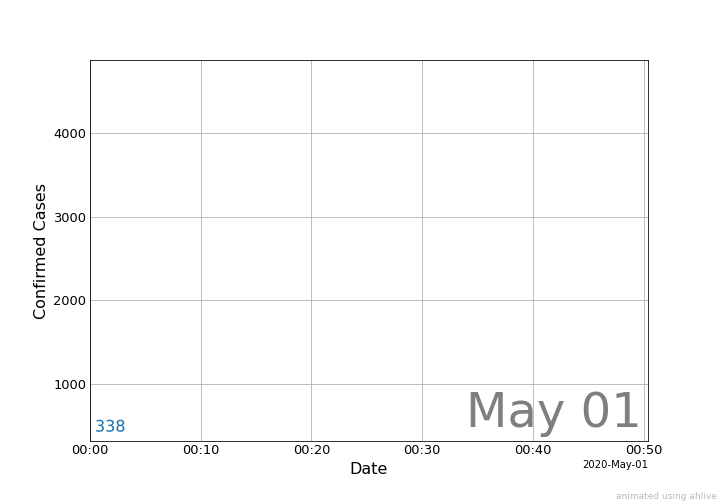

In [30]:
ah_cc = ah.DataFrame(
    cc_scale, 'Date', 'Cases', label='Country',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases',
    animate='test'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_cc.render()

## Let's compare with ...
# Global Deaths Cases

## Read the dataset from CSV

In [31]:
death_cases=pd.read_csv("./Datasets/CONVENIENT_global_deaths.csv").drop([0]).rename(columns={'Country/Region': 'Date'})
death_cases

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,11/25/20,13.0,8.0,20.0,0.0,2.0,0.0,282.0,38.0,0.0,...,1.0,2.0,0.0,4.0,0.0,9.0,0.0,2.0,0.0,0.0
309,11/26/20,12.0,10.0,23.0,0.0,1.0,0.0,227.0,28.0,0.0,...,1.0,1.0,0.0,4.0,0.0,15.0,0.0,1.0,0.0,0.0
310,11/27/20,3.0,18.0,20.0,0.0,1.0,0.0,275.0,22.0,0.0,...,0.0,0.0,0.0,4.0,0.0,9.0,0.0,2.0,0.0,1.0
311,11/28/20,12.0,16.0,21.0,0.0,3.0,0.0,106.0,31.0,0.0,...,1.0,1.0,0.0,4.0,0.0,15.0,0.0,1.0,0.0,0.0


## Let's see the detail of the Global Deaths Cases' dataset

In [32]:
death_cases.info()
death_cases.describe()
death_cases.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1 to 312
Columns: 272 entries, Date to Zimbabwe
dtypes: float64(188), object(84)
memory usage: 665.4+ KB


Date                  0
Afghanistan           0
Albania               0
Algeria               0
Andorra               0
                     ..
West Bank and Gaza    0
Western Sahara        0
Yemen                 0
Zambia                0
Zimbabwe              0
Length: 272, dtype: int64

## Deaths Cases of Southeast Asia

In [33]:
se_asia_death=death_cases[['Date', 'Brunei', 'Burma', 'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 'Malaysia',
            'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'India']]
se_asia_death

,Date,Brunei,Burma,Cambodia,Timor-Leste,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam,India
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,11/25/20,0.0,26.0,0.0,0.0,114.0,0.0,4.0,30.0,0.0,0.0,0.0,524.0
309,11/26/20,0.0,36.0,0.0,0.0,127.0,0.0,3.0,27.0,0.0,0.0,0.0,492.0
310,11/27/20,0.0,19.0,0.0,0.0,169.0,0.0,2.0,13.0,0.0,0.0,0.0,485.0
311,11/28/20,0.0,22.0,0.0,0.0,125.0,0.0,4.0,78.0,1.0,0.0,0.0,496.0


## Total Deaths Cases in Southeast Asia

In [34]:
total_death_se_asia=pd.DataFrame(se_asia_death.sum().drop(['Date']), columns=['Total Death Cases'])
total_death_se_asia

,Total Death Cases
Brunei,3.0
Burma,1918.0
Cambodia,0.0
Timor-Leste,0.0
Indonesia,16815.0
Laos,0.0
Malaysia,357.0
Philippines,8373.0
Singapore,29.0
Thailand,60.0


## Plotting 5 Largest Deaths Cases in Southeast Asia using Bar Chart

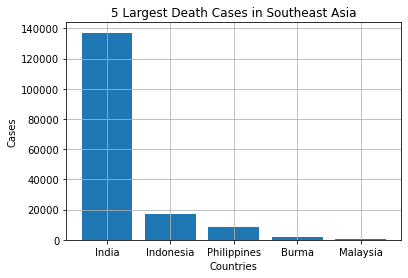

In [35]:
total_in_death=se_asia_death['India'].sum()
total_id_death=se_asia_death['Indonesia'].sum()
total_ph_death=se_asia_death['Philippines'].sum()
total_bu_death=se_asia_death['Burma'].sum()
total_my_death=se_asia_death['Malaysia'].sum()

exp_vals = [total_in_death, total_id_death, total_ph_death, total_bu_death, total_my_death]
exp_labels = ["India", "Indonesia", "Philippines", "Burma", "Malaysia"]

plt.bar(exp_labels, exp_vals)
plt.grid()

plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title('5 Largest Death Cases in Southeast Asia')

plt.show()

## Plotting Covid-19 Death Cases in Indonesia per Day

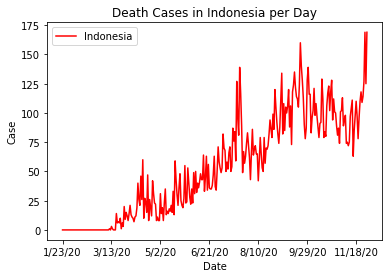

In [36]:
se_asia_death.plot(kind='line', x='Date', y='Indonesia', color='red')

plt.title('Death Cases in Indonesia per Day')
plt.ylabel('Case')
plt.show()

## Monthly Deaths Cases in Indonesia

In [37]:
unique_year = pd.DatetimeIndex(se_asia_death['Date']).year.unique()
unique_month = pd.DatetimeIndex(se_asia_death['Date']).month.unique()
list_sum = []
region = 'Indonesia'

d = pd.DatetimeIndex(se_asia_death['Date'])
for y in unique_year :
    for m in unique_month :
        tmp = se_asia_death[(d.month == m) & (d.year == y)]
        print_date = str(y) + '/' + str(m)
        list_sum.append([print_date, tmp[region].sum()])

list_day = [i[0] for i in list_sum]
list_sum = [i[1] for i in list_sum]
preview = pd.DataFrame(list_day, columns=['Date'])
preview['Total Deaths Cases per Month'] = list_sum

print('Region : ' + region)
preview

Region : Indonesia


,Date,Total Deaths Cases per Month
0,2020/1,0.0
1,2020/2,0.0
2,2020/3,136.0
3,2020/4,656.0
4,2020/5,821.0
5,2020/6,1263.0
6,2020/7,2255.0
7,2020/8,2286.0
8,2020/9,3323.0
9,2020/10,3129.0


## Graph using Ahlive for Deaths Cases

In [38]:
dc_tidy = death_cases.melt(
    id_vars=['Date'],
    var_name='Country', value_name='Cases')
display(dc_tidy)

,Date,Country,Cases
0,1/23/20,Afghanistan,0.0
1,1/24/20,Afghanistan,0.0
2,1/25/20,Afghanistan,0.0
3,1/26/20,Afghanistan,0.0
4,1/27/20,Afghanistan,0.0
...,...,...,...
84547,11/25/20,Zimbabwe,0.0
84548,11/26/20,Zimbabwe,0.0
84549,11/27/20,Zimbabwe,1.0
84550,11/28/20,Zimbabwe,0.0


In [39]:
country = ['Indonesia']
dc_subset = dc_tidy.loc[dc_tidy['Country'].isin(country)]
display(dc_subset)

,Date,Country,Cases
45552,1/23/20,Indonesia,0.0
45553,1/24/20,Indonesia,0.0
45554,1/25/20,Indonesia,0.0
45555,1/26/20,Indonesia,0.0
45556,1/27/20,Indonesia,0.0
...,...,...,...
45859,11/25/20,Indonesia,114.0
45860,11/26/20,Indonesia,127.0
45861,11/27/20,Indonesia,169.0
45862,11/28/20,Indonesia,125.0


In [40]:
dc_country = dc_subset.groupby(['Date', 'Country'])[['Cases']].sum().reset_index()
dc_country = dc_country.loc[dc_country['Date'] >= '5/01/21']
display(dc_country)

,Date,Country,Cases
159,5/1/20,Indonesia,8.0
160,5/10/20,Indonesia,14.0
161,5/11/20,Indonesia,18.0
162,5/12/20,Indonesia,16.0
163,5/13/20,Indonesia,21.0
...,...,...,...
307,9/5/20,Indonesia,108.0
308,9/6/20,Indonesia,85.0
309,9/7/20,Indonesia,105.0
310,9/8/20,Indonesia,100.0


In [41]:
ah_dc = ah.DataFrame(dc_country, 'Date', 'Cases', label='Country')
ah_dc

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 1, state: 153)
Data variables:
    chart    (item) <U4 'line'
    label    (item) <U9 'Indonesia'
    group    (item) <U1 ''
    interp   (item) <U6 'linear'
    ease     (item) <U6 'in_out'
    x        (item, state) object '5/1/20' '5/10/20' ... '9/8/20' '9/9/20'
    y        (item, state) float64 8.0 14.0 18.0 16.0 ... 85.0 105.0 100.0 106.0


In [42]:
dc_dts = cc_country.copy()
dc_dts['Date'] = pd.to_datetime(dc_dts['Date'])
dc_dts = dc_dts.loc[dc_dts['Date'] >= '5/01/20']
dc_dts = dc_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country'
])['Cases'].last().reset_index()
dc_scale = dc_dts.sort_values('Date')
dc_scale['Cases'] /= 1

[########################################] | 100% Completed |  1.3s



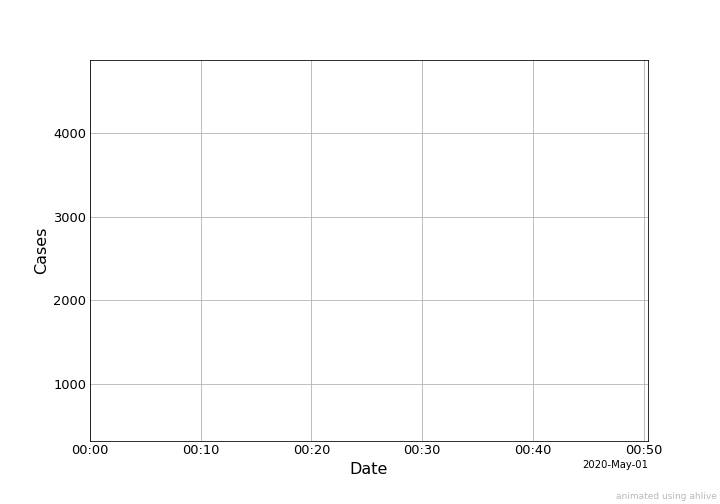

In [43]:
ah_dc = ah.DataFrame(
    dc_scale, 'Date', 'Cases', label='Country',
    figsize=(10, 7), animate='test'
).config('legend', sortby='y')
ah_dc.render()

[########################################] | 100% Completed |  1.5s



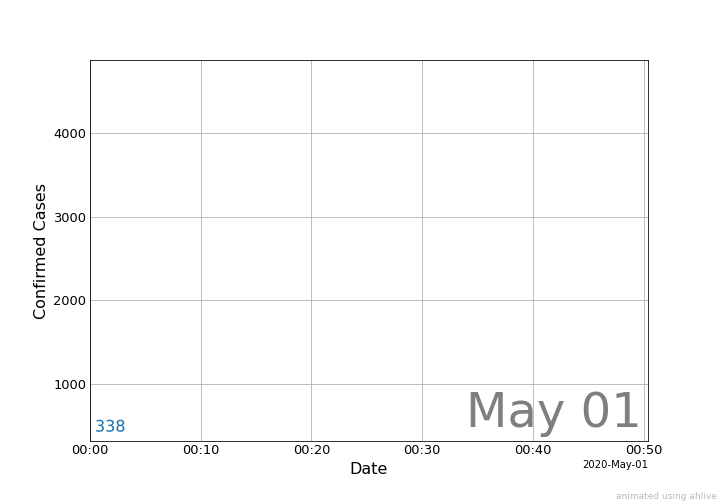

In [44]:
ah_dc = ah.DataFrame(
    dc_scale, 'Date', 'Cases', label='Country',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases',
    animate='test'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_dc.render()

# Forecasting
## COVID-19 data from John Hopkins University
Auto-ARIMA, ARIMA, and Prophet

## Import forecasting libraries

In [45]:
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm
from pmdarima.arima import ADFTest

from prophet import Prophet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import itertools
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## Create variable for Confirmed Cases in Indonesia

In [46]:
id=confirm_cases['Indonesia']
id

1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
        ...  
308    5534.0
309    4917.0
310    5828.0
311    5418.0
312    6267.0
Name: Indonesia, Length: 312, dtype: float64

## Let's see the graph

<AxesSubplot:>

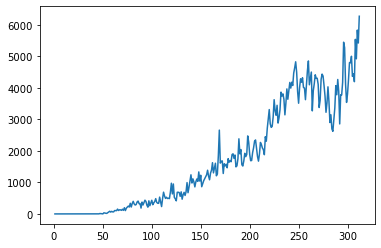

In [47]:
id.plot()

## Forecasting: Auto-ARIMA
Using pmdarima (http://alkaline-ml.com/pmdarima/)

## Augmented Dickey–Fuller test

In [48]:
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(id)

(0.9045570682049417, True)

## Split the data into train set and test set

<AxesSubplot:>

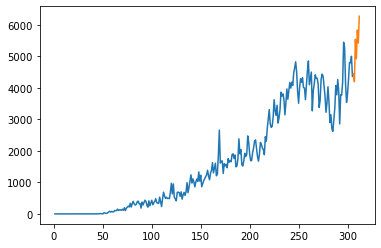

In [49]:
train, test=id[:305], id[305:]
n=len(id)
n_train=len(train)
n_test=len(test)

fig, ax=plt.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

## Create model Auto-ARIMA using pmdarima

In [50]:
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,
                           test="adf",
                           seasonal=False,
                           trace=True)
    return automodel

## Let's see the summary from our model using pmdarima

In [51]:
automodel = arimamodel(train)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4241.323, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4316.026, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4315.861, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4313.766, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4314.764, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4270.198, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4266.466, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4216.371, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4252.212, Time=0.51 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4253.040, Time=0.54 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4272.374, Time=0.59 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=4211.136, Time=0.84 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=4

## Prediction for the next 7 days

In [52]:
pred_arima=automodel.predict(n_periods=7)
pred_arima

array([4011.55922246, 4043.82528538, 4312.91554267, 4760.04985449,
       5027.01519246, 4947.38420589, 4568.19658238])

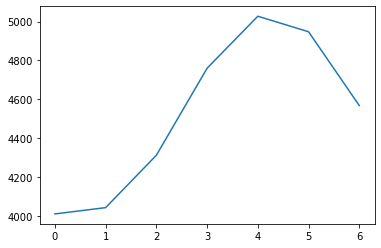

In [53]:
plt.plot(pred_arima)

## Compare prediction results with actual data

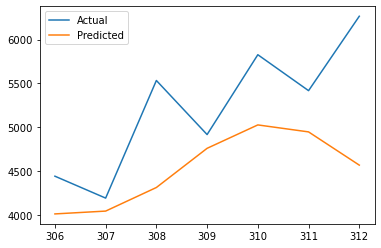

In [54]:
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, pred_arima, label="Predicted")
plt.legend()

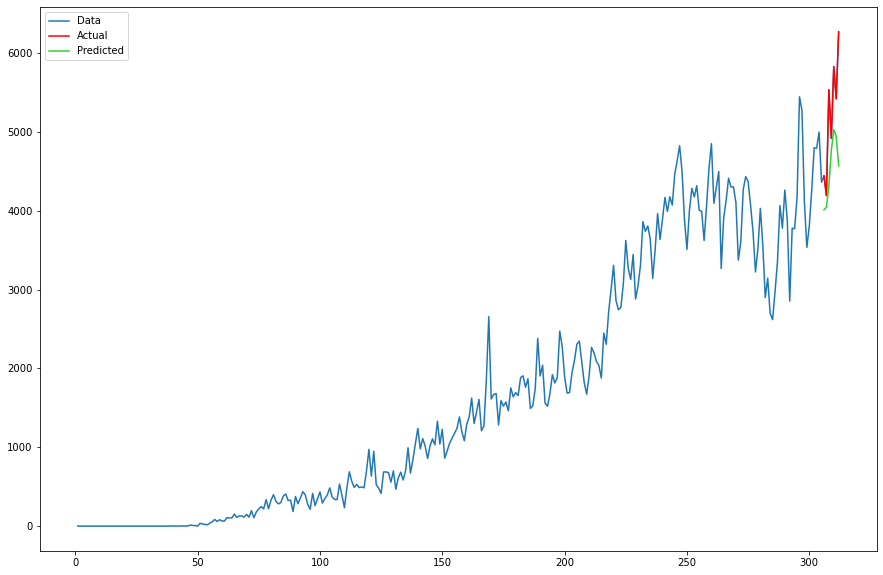

In [55]:
plt.figure(figsize=(15,10))
plt.plot(id, label="Data")
plt.plot(test.index, test, label="Actual", color='red')
plt.plot(test.index, pred_arima, label="Predicted", color='limegreen')
plt.legend()

## Evaluation

In [56]:
rmse_autoarima=sqrt(mean_squared_error(test, pred_arima))
print('Hasil RMSE: ', rmse_autoarima)
mae_autoarima = mean_absolute_error(test, pred_arima)
print('Hasil MAE : ', mae_autoarima)

Hasil RMSE:  884.1383657404606
Hasil MAE :  703.8648734672455


## Forecasting: ARIMA
Using statsmodels (https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)

## Create model ARIMA using Statsmodels

In [57]:
arima = ARIMA(train, order=(5, 1, 4)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Indonesia   No. Observations:                  305
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -2093.663
Date:                Wed, 03 Nov 2021   AIC                           4207.327
Time:                        16:37:31   BIC                           4244.497
Sample:                             0   HQIC                          4222.196
                                - 305                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4268      0.583      0.732      0.464      -0.716       1.569
ar.L2         -0.2525      0.558     -0.452      0.651      -1.346       0.841
ar.L3         -0.6086      0.554     -1.099      0.272      -1.694       0.477
ar.L4         -0.1031      0.139     -0.741      0.459      -0.376       0.170
ar.L5         -0.1474      0.206     -0.715      0.475      -0.552       0.257
ma.L1         -0.8094      0.584     -1.385      0.166      -1.955       0.336
ma.L2          0.1977      0.783      0.252      0.801      -1.338       1.733
ma.L3          0.7067      0.658      1.074      0.283      -0.583       1.996
ma.L4         -0.2962      0.176     -1.685      0.092      -0.641       0.048
sigma2      6.429e+04   4167.658     15.427      0.000    5.61e+04    7.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               231.34
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):              51.70   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction for the next 7 days

In [58]:
predict_arima = arima.predict(len(id), len(id)+6, typ='levels')
predict_arima

312    4045.334522
313    3955.348136
314    4222.752652
315    4641.573802
316    4903.711953
317    4811.425869
318    4436.641827
Name: predicted_mean, dtype: float64

## Behind that ...
Do iteration to get the p, d, and q parameter

In [59]:
p=d=q=range(0,6)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [60]:
for param in pdq:
    try:
        x = ARIMA(train, order=param).fit()
        print(param, x.aic, x.bic)
    except:
        continue

(0, 0, 0) 5359.582600768918 5367.0232243221335
(0, 0, 1) 5007.484262380667 5018.64519771049
(0, 0, 2) 4804.922698969987 4819.803946076417
(0, 0, 3) 4679.528591581935 4698.130150464972
(0, 0, 4) 4708.125098067113 4730.446968726757
(0, 0, 5) 4669.815336410565 4695.857518846817
(0, 1, 0) 4314.764151414481 4318.481179115887
(0, 1, 1) 4312.911176928732 4320.345232331544
(0, 1, 2) 4275.39407248041 4286.545155584628
(0, 1, 3) 4275.161484615877 4290.029595421503
(0, 1, 4) 4276.442117764445 4295.027256271476
(0, 1, 5) 4271.408360965412 4293.710527173849
(0, 2, 0) 4532.902248575554 4536.615981381064
(0, 2, 1) 4308.417933991939 4315.8453996029575
(0, 2, 2) 4306.520861265978 4317.662059682506
(0, 2, 3) 4265.247290946101 4280.102222168139
(0, 2, 4) 4264.705527921142 4283.274191948689
(0, 2, 5) 4267.17159492081 4289.453991753866
(0, 3, 0) 4836.108554331542 4839.818981348917
(0, 3, 1) 4526.089327667044 4533.510181701794
(0, 3, 2) 4308.749872918443 4319.8811539705675
(0, 3, 3) 4313.5362475011725 4328.

(4, 5, 5) 4452.236036582762 4489.273861329324
(5, 0, 0) 4290.973800179166 4317.015982615418
(5, 0, 1) 4273.151315896499 4302.913810109359
(5, 0, 2) 4231.845209034706 4265.3280150241735
(5, 0, 3) 4303.22200636586 4340.425124131933
(5, 0, 4) 4234.235184807285 4275.158614349966
(5, 0, 5) 4235.327029664758 4279.970770984047
(5, 1, 0) 4242.29121675941 4264.593382967848
(5, 1, 1) 4241.512906185126 4267.532100094969
(5, 1, 2) 4204.708603873606 4234.444825484856
(5, 1, 3) 4206.573799900068 4240.027049212724
(5, 1, 4) 4207.326963302509 4244.497240316571
(5, 1, 5) 4208.67812753847 4249.5654322539385
(5, 2, 0) 4363.313239251156 4385.595636084212
(5, 2, 1) 4231.6833559382285 4257.679485576794
(5, 2, 2) 4229.321944235601 4259.031806679676
(5, 2, 3) 4243.681835152436 4277.105430402021
(5, 2, 4) 4209.0419612544065 4246.1792893095
(5, 2, 5) 4209.197566148161 4250.048627008764
(5, 3, 0) 4531.163141594147 4553.425703698396
(5, 3, 1) 4359.5309788249215 4385.503967946545
(5, 3, 2) 4234.861993603801 4264.5

## Evaluation

In [61]:
rmse_arima=sqrt(mean_squared_error(test, predict_arima))
print('Hasil RMSE: ',rmse_arima)
mae_arima = mean_absolute_error(test, predict_arima)
print('Hasil MAE : ', mae_arima)

Hasil RMSE:  969.6117348675128
Hasil MAE :  797.3158911803847


## Forecasting: Prophet
Using Prophet (https://facebook.github.io/prophet/)

## Let's see the Indonesia's dataset

In [62]:
id

1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
        ...  
308    5534.0
309    4917.0
310    5828.0
311    5418.0
312    6267.0
Name: Indonesia, Length: 312, dtype: float64

## Also the graph

<AxesSubplot:>

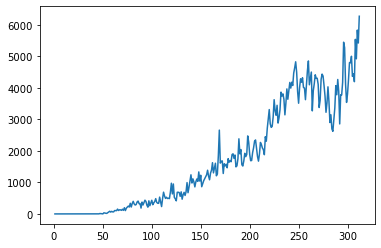

In [63]:
id.plot()

## Create 'ds' and 'y' for prediction

In [64]:
n = confirm_cases.shape[0] - 1
cc_select = confirm_cases[1:n + 1]
cc_select = cc_select[['Date', 'Indonesia']]
cc_select = cc_select.rename(columns={
    'Date': 'ds',
    'Indonesia': 'y'
})

cc_select.tail()

,ds,y
308,11/25/20,5534.0
309,11/26/20,4917.0
310,11/27/20,5828.0
311,11/28/20,5418.0
312,11/29/20,6267.0


## Fitting the model of Prophet

In [65]:
model_prophet = Prophet()
model_prophet.fit(cc_select)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Make future prediction

In [66]:
future = model_prophet.make_future_dataframe(periods=7)

forecast_prophet = model_prophet.predict(future)
forecast_prophet[['ds', 'trend', 'weekly', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,trend,weekly,yhat,yhat_lower,yhat_upper
0,2020-01-24,-194.460623,110.930298,-83.530325,-563.463232,405.490455
1,2020-01-25,-188.427997,110.041711,-78.386286,-579.674895,401.057527
2,2020-01-26,-182.395371,-32.504228,-214.899600,-654.639955,266.202895
3,2020-01-27,-176.362746,-250.220180,-426.582926,-885.518624,64.784817
4,2020-01-28,-170.330120,-118.055732,-288.385852,-770.954736,196.683258
...,...,...,...,...,...,...
313,2020-12-02,4730.930873,49.167902,4780.098775,4303.265447,5269.431144
314,2020-12-03,4748.184064,130.640230,4878.824294,4382.626523,5389.180490
315,2020-12-04,4765.437255,110.930298,4876.367552,4416.613459,5347.351989
316,2020-12-05,4782.690445,110.041711,4892.732156,4432.878739,5365.448173


## Let's see behind the Prophet methods

In [67]:
forecast_prophet['trend'] + forecast_prophet['weekly']

0       -83.530325
1       -78.386286
2      -214.899600
3      -426.582926
4      -288.385852
          ...     
313    4780.098775
314    4878.824294
315    4876.367552
316    4892.732156
317    4767.439408
Length: 318, dtype: float64

In [68]:
forecast_prophet['yhat']

0       -83.530325
1       -78.386286
2      -214.899600
3      -426.582926
4      -288.385852
          ...     
313    4780.098775
314    4878.824294
315    4876.367552
316    4892.732156
317    4767.439408
Name: yhat, Length: 318, dtype: float64

## Let's see the plot

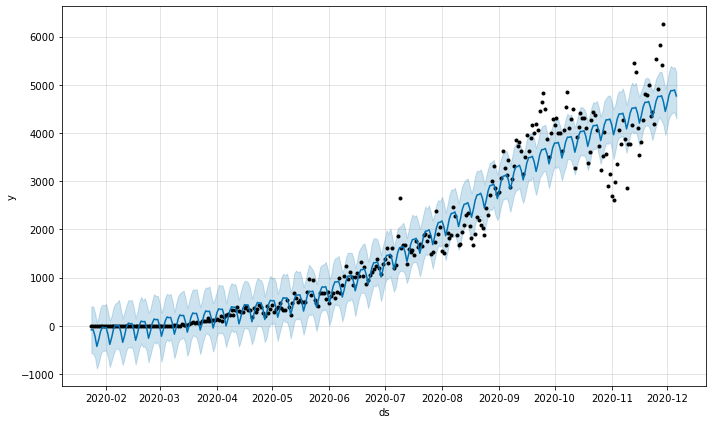

In [69]:
fig=model_prophet.plot(forecast_prophet)

In [70]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model_prophet, forecast_prophet)

## Trend and Weekly

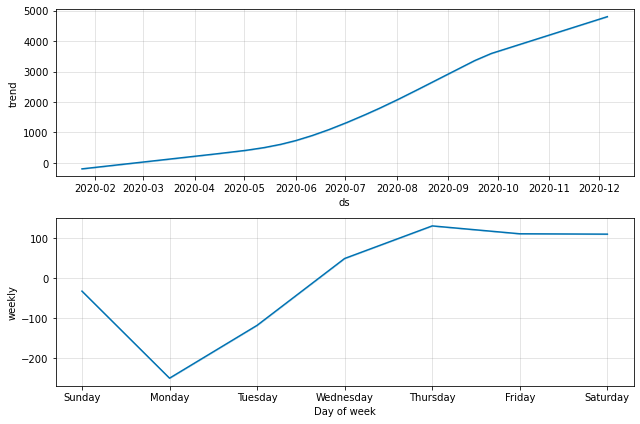

In [71]:
fig=model_prophet.plot_components(forecast_prophet)

In [72]:
plot_components_plotly(model_prophet, forecast_prophet)

## Evaluation

In [73]:
from prophet.diagnostics import cross_validation
cc_cv = cross_validation(model_prophet, initial='180 days', period='7 day', horizon='7 days')
cc_cv

INFO:prophet:Making 18 forecasts with cutoffs between 2020-07-26 00:00:00 and 2020-11-22 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-27,1763.853065,1599.584752,1929.374769,1525.0,2020-07-26
1,2020-07-28,1840.718903,1667.926290,1996.441123,1748.0,2020-07-26
2,2020-07-29,1905.496264,1737.221988,2074.326003,2381.0,2020-07-26
3,2020-07-30,1976.237024,1813.328484,2138.594412,1904.0,2020-07-26
4,2020-07-31,1917.660272,1754.924558,2092.534174,2040.0,2020-07-26
...,...,...,...,...,...,...
121,2020-11-25,4304.347022,3911.987050,4719.409816,5534.0,2020-11-22
122,2020-11-26,4413.019119,4033.890433,4829.068526,4917.0,2020-11-22
123,2020-11-27,4381.895048,3971.000308,4790.656314,5828.0,2020-11-22
124,2020-11-28,4400.968374,3986.227169,4824.347881,5418.0,2020-11-22


In [74]:
from prophet.diagnostics import performance_metrics
cc_p = performance_metrics(cc_cv)
cc_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,617901.955201,786.067399,629.040452,0.216304,0.154827,0.190449,0.166667
1,2 days,362953.308041,602.456063,467.701220,0.152805,0.101302,0.139356,0.277778
2,3 days,372688.374103,610.482083,495.906318,0.141138,0.159153,0.139777,0.222222
3,4 days,340849.945022,583.823556,467.826202,0.123452,0.101549,0.124870,0.388889
4,5 days,668157.994425,817.409319,673.948707,0.178928,0.165923,0.177119,0.222222
5,6 days,560335.673146,748.555725,654.638673,0.180107,0.147940,0.177975,0.111111
6,7 days,761073.873919,872.395480,641.204671,0.185137,0.167070,0.175625,0.388889


## Comparison

In [75]:
rmse_prophet = cc_p.iloc[6]['rmse']
mae_prophet = cc_p.iloc[6]['mae']

data = {'Methods':['Auto-ARIMA', 'ARIMA', 'Prophet'],
        'RMSE':[rmse_autoarima, rmse_arima, rmse_prophet],
       'MAE': [mae_autoarima, mae_arima, mae_prophet]}

compare = pd.DataFrame(data)
compare

,Methods,RMSE,MAE
0,Auto-ARIMA,884.138366,703.864873
1,ARIMA,969.611735,797.315891
2,Prophet,872.395480,641.204671


## The best model for this forecasting is ...
![title](Datasets/ProphetLogo.png)